Дана статистика пользователей adult.csv.

Получите значения AUC для различных моделей и их параметров.

Решением будет ссылка на гитхаб с ноутбуком.

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('adult.csv')

# label y
def label_y(y):
    if y == '<=50K':
        return 0
    elif y == '>50K':
        return 1
    else:
        return y
    

data['income'] = data['income'].apply(label_y)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


**No n/a values. Thanks teacher :)**

In [5]:
ProfileReport(data)

In [6]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

# Result of data analys
### Has '?' values
* workclass
* occupation

### Not a categorical values
* fnlwgt
* capital-gain
* capita-loss
* hours-per-week
* educational-num (i think it is a measure of education)

In [7]:
def get_one_hot(data, hot_cols, q_cols = []):
    for x in data.columns:
        if x in hot_cols:
            new_cols = pd.get_dummies(data[x])
            data = pd.concat([data, new_cols], axis=1)
            del(data[x])
            
            # remove '?' columns
            if x in q_cols:
                del(data['?'])
    
    return data
                
X = get_one_hot(data, 
                    ['workclass', 'race', 'education', 'occupation', 'relationship', 'native-country', 'marital-status'], 
                    ['workclass', 'occupation'])
                
# remove useless feature
del(X['Other'])

def gender(sex):
    if sex == 'Male':
        return 1
    else:
        return 0

X['gender'] = X['gender'].apply(gender) 

# Features are ready

In [8]:
y = X['income']
del(X['income'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

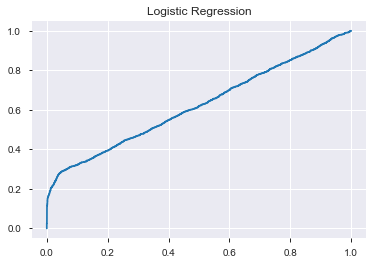

AUC score:  0.6216792984741357


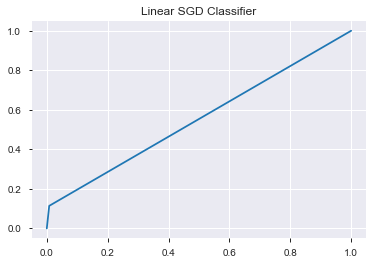

AUC score:  0.5530909371323461


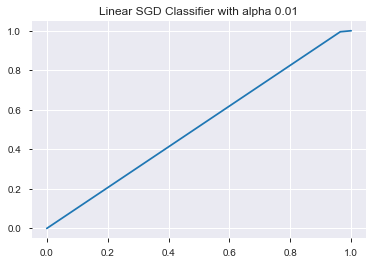

AUC score:  0.515239925901394


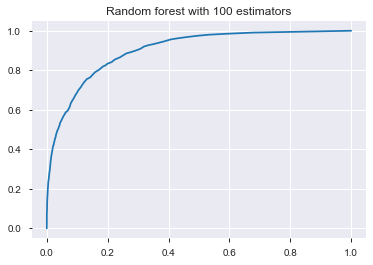

AUC score:  0.9013506938352328


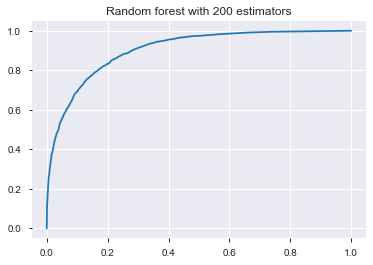

AUC score:  0.9031793096057683


In [20]:
# severals models
models = [{'model': LogisticRegression(), 'label': 'Logistic Regression'}]
models.append({'model': SGDClassifier(loss='modified_huber'), 'label': 'Linear SGD Classifier'})
models.append({'model': SGDClassifier(alpha=0.01, loss='modified_huber'), 'label': 'Linear SGD Classifier with alpha 0.01'})
models.append({'model': RandomForestClassifier(), 'label': 'Random forest with 100 estimators'})
models.append({'model': RandomForestClassifier(n_estimators = 200), 'label': 'Random forest with 200 estimators'})

for model in models:
    model['model'].fit(X_train, y_train)
    predictions = model['model'].predict_proba(X_test)[:,1] #probability prediction of y >50k
    
    fpr, tpr, thres = roc_curve( y_test, predictions)
    plt.plot( fpr, tpr )
    plt.title(model['label'])
    plt.show()

    print('AUC score: ', roc_auc_score(y_test, predictions))

Best is random forest. Probobaly over learned.